# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

642

In [3]:
city_names_ls = []
cloudiness_ls = []
country_ls = []
date_ls = []
humidity_ls = []
lat_ls = []
lng_ls = []
max_temp_ls = []
wind_speed_ls = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(url + city).json()
        city_names_ls.append(response["name"])
        cloudiness_ls.append(response["clouds"]["all"])
        country_ls.append(response["sys"]["country"])
        date_ls.append(response["dt"])
        humidity_ls.append(response["main"]["humidity"])
        lat_ls.append(response["coord"]["lat"])
        lng_ls.append(response["coord"]["lon"])
        max_temp_ls.append(response["main"]["temp_max"])
        wind_speed_ls.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
  

print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 : albany
Processing Record 2 of Set 1 : terney
City not found. Skipping...
Processing Record 3 of Set 1 : pedasi
Processing Record 4 of Set 1 : wakkanai
Processing Record 5 of Set 1 : talnakh
City not found. Skipping...
Processing Record 6 of Set 1 : mataura
Processing Record 7 of Set 1 : bilma
City not found. Skipping...
Processing Record 8 of Set 1 : makakilo city
Processing Record 9 of Set 1 : hobart
Processing Record 10 of Set 1 : brae
Processing Record 11 of Set 1 : busselton
Processing Record 12 of Set 1 : yar-sale
Processing Record 13 of Set 1 : bluff
Processing Record 14 of Set 1 : norman wells
Processing Record 15 of Set 1 : qasigiannguit
Processing Record 16 of Set 1 : claresholm
Processing Record 17 of Set 1 : ribeira grande
Processing Record 18 of Set 1 : hermanus
Processing Record 19 of Set 1 : korem
City not found. Skipping...
Processing Record 20 of Set 1 : balabac
Processing Record 21 

Processing Record 35 of Set 4 : souillac
Processing Record 36 of Set 4 : seydi
Processing Record 37 of Set 4 : san cristobal
Processing Record 38 of Set 4 : port macquarie
Processing Record 39 of Set 4 : sarmanovo
Processing Record 40 of Set 4 : kabanjahe
Processing Record 41 of Set 4 : media luna
City not found. Skipping...
Processing Record 42 of Set 4 : kailua
Processing Record 43 of Set 4 : launceston
Processing Record 44 of Set 4 : avera
Processing Record 45 of Set 4 : georgetown
Processing Record 46 of Set 4 : los llanos de aridane
Processing Record 47 of Set 4 : alta floresta
Processing Record 48 of Set 4 : bouza
Processing Record 49 of Set 4 : biak
City not found. Skipping...
Processing Record 50 of Set 4 : aripuana
Processing Record 0 of Set 5 : nome
Processing Record 1 of Set 5 : ardakan
Processing Record 2 of Set 5 : ambad
Processing Record 3 of Set 5 : new ross
City not found. Skipping...
Processing Record 4 of Set 5 : dingle
Processing Record 5 of Set 5 : saskylakh
City no

Processing Record 24 of Set 8 : nouadhibou
Processing Record 25 of Set 8 : mabaruma
Processing Record 26 of Set 8 : esperance
Processing Record 27 of Set 8 : mont-de-marsan
Processing Record 28 of Set 8 : beloha
Processing Record 29 of Set 8 : verkhoshizhemye
Processing Record 30 of Set 8 : wasilla
Processing Record 31 of Set 8 : olafsvik
Processing Record 32 of Set 8 : bathurst
Processing Record 33 of Set 8 : kruisfontein
Processing Record 34 of Set 8 : gasa
Processing Record 35 of Set 8 : sompeta
Processing Record 36 of Set 8 : kargopol
Processing Record 37 of Set 8 : dvorichna
City not found. Skipping...
Processing Record 38 of Set 8 : tucumcari
Processing Record 39 of Set 8 : bandarbeyla
Processing Record 40 of Set 8 : maniitsoq
Processing Record 41 of Set 8 : miri
Processing Record 42 of Set 8 : tonj
Processing Record 43 of Set 8 : nizhnyaya omka
Processing Record 44 of Set 8 : katsuura
Processing Record 45 of Set 8 : jaisalmer
Processing Record 46 of Set 8 : lesozavodsk
Processin

Processing Record 9 of Set 12 : qaqortoq
Processing Record 10 of Set 12 : awjilah
Processing Record 11 of Set 12 : mashhad
Processing Record 12 of Set 12 : eyl
Processing Record 13 of Set 12 : luanda
Processing Record 14 of Set 12 : sakakah
Processing Record 15 of Set 12 : wamba
Processing Record 16 of Set 12 : maicao
Processing Record 17 of Set 12 : singkawang
Processing Record 18 of Set 12 : arlit
Processing Record 19 of Set 12 : ninh binh
Processing Record 20 of Set 12 : reshetylivka
Processing Record 21 of Set 12 : camopi
Processing Record 22 of Set 12 : anqing
Processing Record 23 of Set 12 : adrar
Processing Record 24 of Set 12 : pacific grove
Processing Record 25 of Set 12 : sokoni
Processing Record 26 of Set 12 : lichuan
Processing Record 27 of Set 12 : canico
City not found. Skipping...
Processing Record 28 of Set 12 : raiganj
Processing Record 29 of Set 12 : jijiga
Processing Record 30 of Set 12 : mount gambier
Processing Record 31 of Set 12 : sankt georgen
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({ 
                "City" : city_names_ls,
                "Cloudiness" : cloudiness_ls,
                "Country" : country_ls,
                "Date" : date_ls,
                "Humidity" : humidity_ls,
                "Lat" : lat_ls,
                "Lng" : lng_ls,
                "Max Temp" : max_temp_ls,
                "Wind Speed" : wind_speed_ls
})
weather_df.count()

City          596
Cloudiness    596
Country       596
Date          596
Humidity      596
Lat           596
Lng           596
Max Temp      596
Wind Speed    596
dtype: int64

In [6]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,26,US,1594701613,85,42.60,-73.97,72.00,6.73
1,Terney,46,RU,1594701781,71,45.05,136.61,66.94,5.46
2,Pedasí,95,PA,1594701782,83,7.53,-80.03,79.88,5.23
3,Wakkanai,20,JP,1594701782,68,45.41,141.67,71.60,12.75
4,Talnakh,75,RU,1594701782,93,69.49,88.40,53.60,15.66
...,...,...,...,...,...,...,...,...,...
591,Ják,94,HU,1594701913,81,47.14,16.58,55.00,1.70
592,Laurel,75,US,1594701899,94,39.10,-76.85,77.00,4.72
593,Omboué,95,GA,1594701914,87,-1.57,9.26,71.71,8.48
594,Zeya,41,RU,1594701914,23,53.75,127.27,97.63,5.50


In [7]:
weather_df.to_csv('../output_data/cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

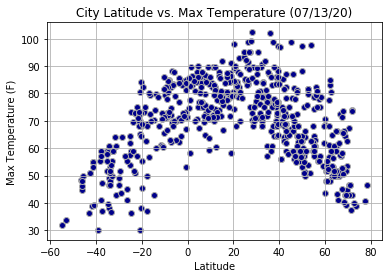

This shows that as cities get further away from equator that they are cooler


In [48]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "darkblue", edgecolor = "darkgrey")

plt.title("City Latitude vs. Max Temperature (07/13/20)")

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("../Images/City Latitude vs Max Temperature.png")

plt.show()
print("This plot shows that as cities get further away from equator that they are cooler")

## Latitude vs. Humidity Plot

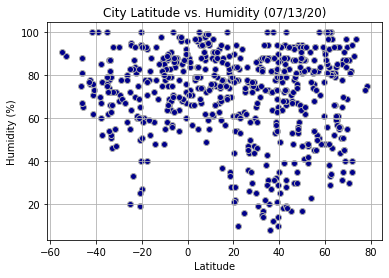

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "darkblue", edgecolor = "darkgrey")

plt.title("City Latitude vs. Humidity (07/13/20)")

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("../Images/City Latitude vs Humidity.png")

plt.show()
print("This plot shows that humidity is well spread throughout cities despite location")

## Latitude vs. Cloudiness Plot

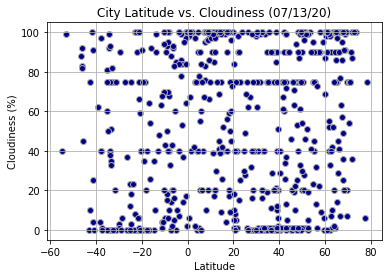

In [13]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "darkblue", edgecolor = "darkgrey")

plt.title("City Latitude vs. Cloudiness (07/13/20)")

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("../Images/City Latitude vs Cloudiness.png")

plt.show()
print("This plot shows that cloudiness is well spread throughout cities despite location")

## Latitude vs. Wind Speed Plot

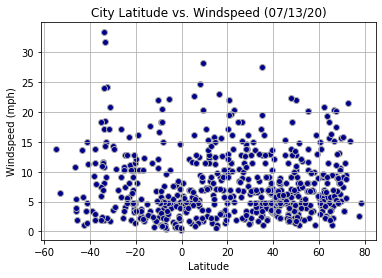

In [14]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "darkblue", edgecolor = "darkgrey")

plt.title("City Latitude vs. Windspeed (07/13/20)")

plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")

plt.grid(True)

plt.savefig("../Images/City Latitude vs Windspeed.png")

plt.show()
print("This plot shows that windspeed is well spread throughout cities despite location")

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots
nor_hemi = weather_df.loc[weather_df["Lat"] >= 0]
sou_hemi = weather_df.loc[weather_df["Lat"] < 0]

In [22]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.62


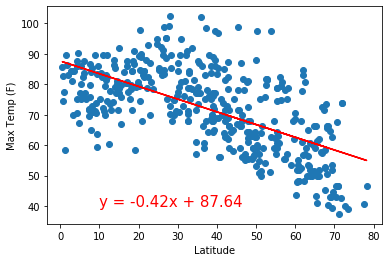

In [38]:
equation = linear_agression(nor_hemi["Lat"], nor_hemi["Max Temp"])


annotate(equation, 10, 40)


plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")

plt.savefig("../Images/NorHemi Max Temp vs. Latitude Linear Regression.png")
print("This linear regression shows that cities gets hotter as get closer to equator in northern hemisphere")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.74


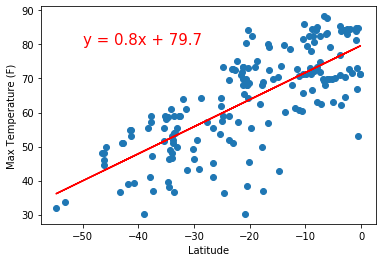

In [40]:
equation = linear_agression(sou_hemi["Lat"], sou_hemi["Max Temp"])

annotate(equation, -50, 80)

plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("../Images/SouHemi Max Temp vs. Latitude Linear Regression.png")
print("This linear regression shows that cities gets colder as get away to equator in southern hemisphere")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.08


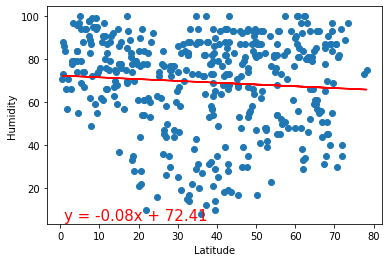

In [41]:
equation = linear_agression(nor_hemi["Lat"], nor_hemi["Humidity"])


annotate(equation, 1, 5)


plt.ylabel("Humidity")
plt.xlabel("Latitude")


plt.savefig("../Images/NorHemi Humidity vs. Latitude Linear Regression.png")
print("This linear regression shows that cities' humidity doesn't change much as get closer to equator in northern hemisphere")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.09


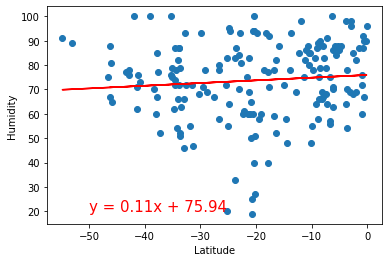

In [43]:
equation = linear_agression(sou_hemi["Lat"], sou_hemi["Humidity"])

annotate(equation, -50, 20)

plt.ylabel("Humidity")
plt.xlabel("Latitude")

plt.savefig("../Images/SouHemi Humidity vs. Latitude Linear Regression.png")
print("This linear regression shows that cities' humidity doesn't change much as get closer to equator in southern hemisphere")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.01


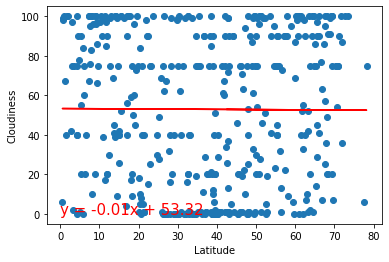

In [28]:
equation = linear_agression(nor_hemi["Lat"], nor_hemi["Cloudiness"])


annotate(equation, 0, 0)


plt.ylabel("Cloudiness")
plt.xlabel("Latitude")


plt.savefig("../Images/NorHemi Cloudiness vs. Latitude Linear Regression.png")
print("This linear regression shows that cities' cloudiness doesn't change much as get closer to equator in northern hemisphere")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.1


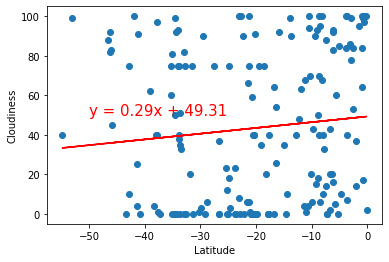

In [44]:
equation = linear_agression(sou_hemi["Lat"], sou_hemi["Cloudiness"])

annotate(equation, -50, 50)

plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.savefig("../Images/SouHemi Cloudiness vs. Latitude Linear Regression.png")
print("This linear regression shows that cities' cloudiness doesn't change much as get closer to equator in southern hemisphere")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.0


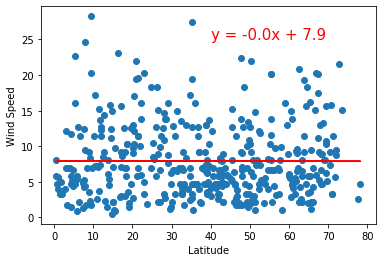

In [45]:
equation = linear_agression(nor_hemi["Lat"], nor_hemi["Wind Speed"])


annotate(equation, 40, 25)


plt.ylabel("Wind Speed")
plt.xlabel("Latitude")


plt.savefig("../Images/NorHemi Wind Speed vs. Latitude Linear Regression.png")
print("This linear regression shows that cities' windiness doesn't change much as get closer to equator in northern hemisphere")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.24


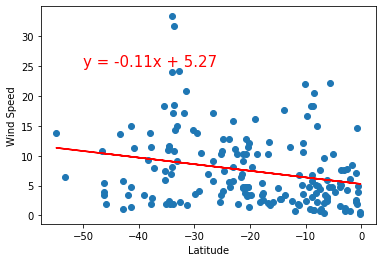

In [47]:
equation = linear_agression(sou_hemi["Lat"], sou_hemi["Wind Speed"])

annotate(equation, -50, 25)

plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

plt.savefig("../Images/SouHemi Wind Speed vs. Latitude Linear Regression.png")
print("This linear regression shows that cities' windiness doesn't change much as get closer to equator in northern hemisphere")

In [ ]:
#Three Observable Trends

#1- Out of the cities analyzed, tends to be hotter by the equatator
#2- This time of year there tends to be more wind in cities away from equator in southern hemisphere
#3- Humidty, cloudiness, and wind speeds did not any obvious trends in the nothern hemisphere.